## Introduction

It is very hard to quantify what exactly makes a hockey team good - although one common
trait about them is that they are always competing for the Stanley Cup in May and June.
If you ask anyone in the hockey community, there are always a few common characteristics
of these teams such as work ethic, resilience, and toughness. From the perspective of a data
scientist, these traits are hard to quantify since there is no true number to represent these.
However, there are other quantifiable factors that are influenced by these traits - these will
help us determine who will hoist the cup this year.

We look to build a model that can predict these yearly champions, specifically, the Stanley
Cup winners for the modern era of the National Hockey League (NHL). The NHL provides
access to a wide array of data involving players, teams and previous champions for over
the last century. Some categories hypothesized to have large correlations include goals for,
goals against, shots, and scoring depth. We will carefully select a set of features that heavily
influence these teams successfulness.

These tools and resources will allow us to create a supervised learning model that we
will verify by predicting a subset of the previous Stanley Cup winners. The end goal of our
model is to make a prediction for the next champion, which will be determined in June 2025.
Aside from this, we will also produce a set of likelihoods for playoff teams to win the Stanley
Cup.

## Imports

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ipywidgets
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (8,3)

## Data Loading

In [69]:
df = pd.read_csv('NHLTeamPlayoffStats.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      376 non-null    int64  
 1   faceoffWinPct           376 non-null    float64
 2   gamesPlayed             376 non-null    int64  
 3   goalsAgainst            376 non-null    int64  
 4   goalsAgainstPerGame     376 non-null    float64
 5   goalsFor                376 non-null    int64  
 6   goalsForPerGame         376 non-null    float64
 7   losses                  376 non-null    int64  
 8   otLosses                0 non-null      float64
 9   penaltyKillNetPct       376 non-null    float64
 10  penaltyKillPct          376 non-null    float64
 11  pointPct                376 non-null    float64
 12  points                  376 non-null    int64  
 13  powerPlayNetPct         376 non-null    float64
 14  powerPlayPct            376 non-null    fl

Some of the features such as `otLosses` and `ties` are null values because there are no ties or overtime losses in playoffs (an overtime loss is just a loss). We don't need these so we will drop them.

In [70]:
df = df.drop(['otLosses', 'ties'], axis=1)
df.describe()

,id,faceoffWinPct,gamesPlayed,goalsAgainst,goalsAgainstPerGame,goalsFor,goalsForPerGame,losses,penaltyKillNetPct,penaltyKillPct,...,seasonId,shotsAgainstPerGame,shotsForPerGame,teamId,wins,winsInRegulation,winsInShootout,playoffScore,last5PlayoffScore,winRateAgainst500Teams
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,...,3.760000e+02,376.000000,376.000000,376.00000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,187.500000,0.499460,10.904255,29.252660,2.860974,29.252660,2.521922,5.444149,0.824950,0.805011,...,2.012180e+07,30.704820,30.279558,16.62500,5.452128,4.188830,0.005319,0.340758,0.964428,0.235268
std,108.686092,0.032010,6.335625,14.873959,0.681395,20.532705,0.631809,1.943761,0.087388,0.085531,...,6.902638e+04,3.814766,3.945482,11.27098,4.669087,3.764959,0.072835,0.291818,0.826301,0.074973
min,0.000000,0.400432,3.000000,7.000000,1.500000,2.000000,0.400000,3.000000,0.478260,0.437500,...,2.000200e+07,20.166660,19.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060976
25%,93.750000,0.479023,6.000000,17.000000,2.400000,13.000000,2.142850,4.000000,0.768589,0.755556,...,2.006201e+07,28.134878,27.500000,8.00000,2.000000,1.000000,0.000000,0.125000,0.250000,0.182927
50%,187.500000,0.498375,8.500000,24.000000,2.714280,22.000000,2.550500,4.000000,0.840000,0.812500,...,2.012201e+07,30.535710,29.833330,16.00000,4.000000,3.000000,0.000000,0.250000,0.781250,0.243902
75%,281.250000,0.520134,15.000000,40.000000,3.285710,41.250000,2.941170,7.000000,0.883864,0.857531,...,2.018202e+07,32.833330,32.678565,23.00000,8.000000,6.000000,0.000000,0.500000,1.500000,0.280488
max,375.000000,0.593023,27.000000,82.000000,5.600000,88.000000,4.333330,12.000000,1.071428,1.000000,...,2.023202e+07,44.000000,44.285710,55.00000,18.000000,16.000000,1.000000,1.125000,3.687500,0.439024


We will now inspect certain years considered as "outliers"

In [71]:
df['seasonId'].unique()

array([20002001, 20012002, 20022003, 20032004, 20052006, 20062007,
       20072008, 20082009, 20092010, 20102011, 20112012, 20122013,
       20132014, 20142015, 20152016, 20162017, 20172018, 20182019,
       20192020, 20202021, 20212022, 20222023, 20232024])

Since this dataset includes every seasons after the 2000-01 season, the important ones to note are:

- **2004-05:** season did not occur due to a lockout
- **2019-20:** season was cut short due to COVID-19
- **2020-21:** season was cut short due to COVID-19

2004-05 is already excluded - we will drop the other two seasons since these are "outlier" seasons.

In [72]:
df = df[df['seasonId'] != 20192020]
df = df[df['seasonId'] != 20202021]
seasons = df['seasonId'].unique()
seasons

array([20002001, 20012002, 20022003, 20032004, 20052006, 20062007,
       20072008, 20082009, 20092010, 20102011, 20112012, 20122013,
       20132014, 20142015, 20152016, 20162017, 20172018, 20182019,
       20212022, 20222023, 20232024])

Note that teams that have won the Stanley Cup every season have a `playoffScore` of 1.0. This is calculated by

$$
\text{playoffScore} = \frac{\text{playoff wins}}{\text{number of possible games played}}
$$

In [73]:
df[df['playoffScore'] == 1.0][['teamFullName', 'seasonId']]

,teamFullName,seasonId
4,Colorado Avalanche,20002001
27,Detroit Red Wings,20012002
37,New Jersey Devils,20022003
49,Tampa Bay Lightning,20032004
68,Carolina Hurricanes,20052006
85,Anaheim Ducks,20062007
101,Detroit Red Wings,20072008
126,Pittsburgh Penguins,20082009
128,Chicago Blackhawks,20092010
145,Boston Bruins,20102011


In [80]:
smin = int(str(seasons[0])[:4])
smax = int(str(seasons[-1])[:4])

@ipywidgets.interact(season=(smin,smax))
def disp(season=smin):
    seasonId = int(f'{season}{season+1}')
    print(f'Season: {seasonId}')
    
    df_season = df[df['seasonId'] == seasonId]
    
    plt.scatter(df_season['teamFullName'], df_season['playoffScore'])
    plt.xlabel('team')
    plt.ylabel('playoffScore')
    plt.xticks(rotation=60, ha='right')
    plt.ylim(-0.2,1.2)
    
    return

interactive(children=(IntSlider(value=2000, description='season', max=2023, min=2000), Output()), _dom_classes…

We can also look at teams who have had the most playoff success over the last couple decades.

The expected ones are the teams with dominant eras such as the 2010-2015 Chicago Blackhawks.

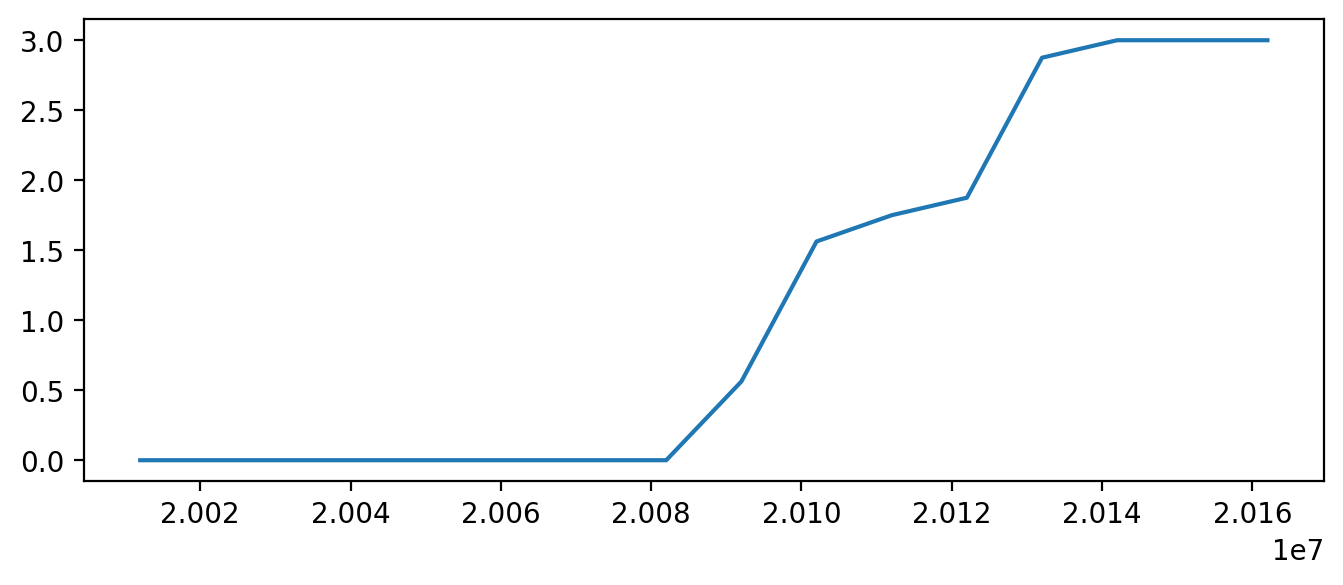

In [81]:
chi_df = df[df['teamFullName'] == 'Chicago Blackhawks']
plt.plot(chi_df['seasonId'], chi_df['last5PlayoffScore'])